# Customer Lifetime value for an auto insurance company
 Objective:- For an Auto Insurance company, predict the customer life time value (CLV). CLV is the total revenue the client will derive from their entire relationship with a customer. Because we don't know how long each customer relationship will be, we make a good estimate and state CLV as a periodic value — that is, we usually say “this customer's 12-month (or 24-month, etc) CLV is something”.

# Import Libraries¶
Let's import some libraries to get started!

In [107]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Loading our  CLV dataset


In [108]:
#import dataset
os.chdir("E:\data.csv")

In [109]:
data=pd.read_csv("Data_CLV.csv")

In [110]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [111]:
data.shape

(9134, 24)

In [112]:
#show all columns
pd.set_option('display.max_columns', None)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [114]:
data=data.drop(["Customer","Effective To Date"],axis=1)

In [115]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [116]:
#missing values per variable
data.isnull().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

## There are no missing values in the dataset¶

In [117]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [118]:
#Shows the all duplicate value
data[data.duplicated()]

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
1031,California,4458.113369,Yes,Basic,Bachelor,Retired,M,17622,Suburban,Divorced,65,1,36,1,3,Personal Auto,Personal L3,Offer1,Agent,312.000000,Four-Door Car,Medsize
1093,California,3436.134281,Yes,Extended,Doctor,Employed,M,30817,Rural,Divorced,88,25,43,0,1,Personal Auto,Personal L3,Offer2,Branch,91.834668,Four-Door Car,Medsize
1286,Oregon,5389.499465,Yes,Extended,College,Employed,M,66429,Rural,Married,136,35,93,0,1,Personal Auto,Personal L3,Offer2,Agent,57.712985,Sports Car,Medsize
1981,California,5595.389905,Yes,Basic,High School or Below,Employed,F,74454,Suburban,Single,71,25,29,0,3,Personal Auto,Personal L3,Offer2,Call Center,340.800000,Four-Door Car,Medsize
2071,Oregon,2538.626320,Yes,Basic,Bachelor,Retired,M,18608,Suburban,Divorced,71,13,24,0,1,Corporate Auto,Corporate L3,Offer2,Web,340.800000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9002,California,7019.177186,Yes,Basic,College,Retired,M,26806,Suburban,Married,63,32,19,0,2,Personal Auto,Personal L2,Offer1,Agent,302.400000,Four-Door Car,Medsize
9036,California,4929.549699,Yes,Basic,Bachelor,Employed,M,25632,Suburban,Married,63,27,52,0,7,Personal Auto,Personal L2,Offer2,Call Center,351.270869,Two-Door Car,Medsize
9088,California,3885.456401,Yes,Premium,College,Unemployed,M,0,Suburban,Married,105,3,92,0,1,Personal Auto,Personal L3,Offer1,Branch,504.000000,Four-Door Car,Large
9122,California,25464.820590,Yes,Extended,College,Retired,F,13663,Suburban,Single,97,1,66,0,2,Personal Auto,Personal L2,Offer1,Branch,465.600000,Four-Door Car,Small


In [119]:
#Removed the duplicates value
data=data.drop_duplicates()

In [120]:
data.shape

(8971, 22)

In [121]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Correlation with Heatmap
A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. It is very important in Feature Selection

In [122]:
data.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.025332,0.398702,0.008609,0.008715,-0.037128,0.022039,0.227534
Income,0.025332,1.000000,-0.016478,-0.026008,-0.001438,0.008091,-0.007824,-0.355936
Monthly Premium Auto,0.398702,-0.016478,1.000000,0.005730,0.019598,-0.013546,-0.009477,0.630994
Months Since Last Claim,0.008609,-0.026008,0.005730,1.000000,-0.043088,0.001899,0.006098,0.009106
Months Since Policy Inception,0.008715,-0.001438,0.019598,-0.043088,1.000000,-0.003693,-0.012592,0.003236
Number of Open Complaints,-0.037128,0.008091,-0.013546,0.001899,-0.003693,1.000000,-0.002128,-0.015620
Number of Policies,0.022039,-0.007824,-0.009477,0.006098,-0.012592,-0.002128,1.000000,-0.002472
Total Claim Amount,0.227534,-0.355936,0.630994,0.009106,0.003236,-0.015620,-0.002472,1.000000


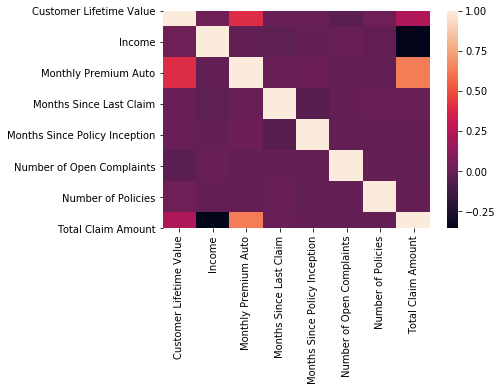

In [123]:
sns.heatmap(data.corr())

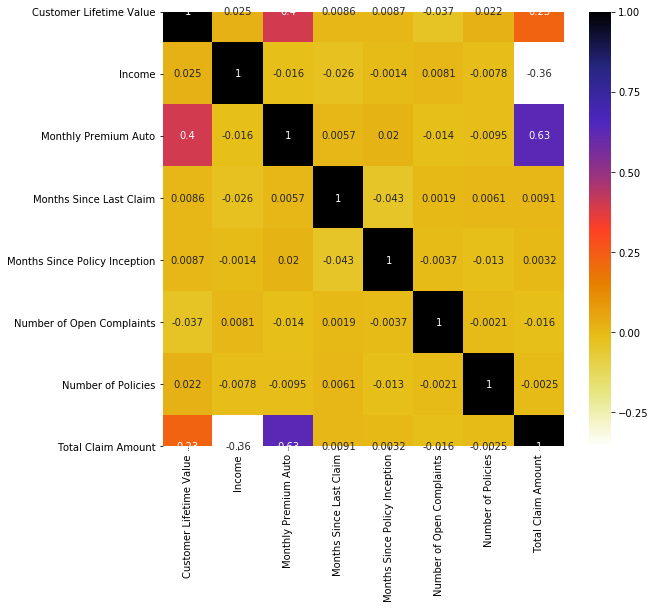

In [124]:
plt.figure(figsize=(9,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Exploratory Data Analysis and apply Linear Regression with Python¶
For this lecture we will be working with the Customer Lifetime value for an auto insurance company Data Set from Kaggle.
# Bivariate Analysis

## Analyzing Target Variable
In this Dataset customer Lifetime Value is the target variable

In [125]:
data['Customer Lifetime Value'].describe()

count     8971.000000
mean      8004.192319
std       6867.941039
min       1898.007675
25%       3999.497700
50%       5792.439588
75%       8954.637109
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

mu = 8004.19 and sigma = 6867.56


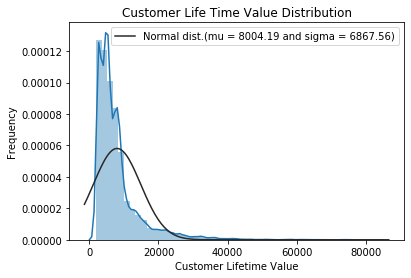

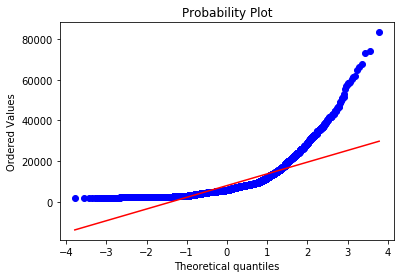

In [126]:
from scipy import stats
from scipy.stats import norm,skew

sns.distplot(data['Customer Lifetime Value'],fit=norm)

(mu,sigma) = norm.fit(data['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(data['Customer Lifetime Value'],plot = plt)
plt.show()

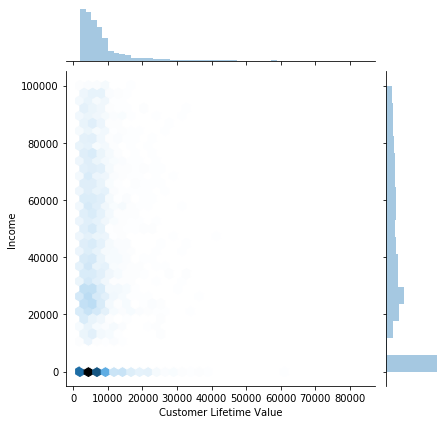

In [127]:
sns.jointplot(x="Customer Lifetime Value",y="Income",data=data,kind="hex")

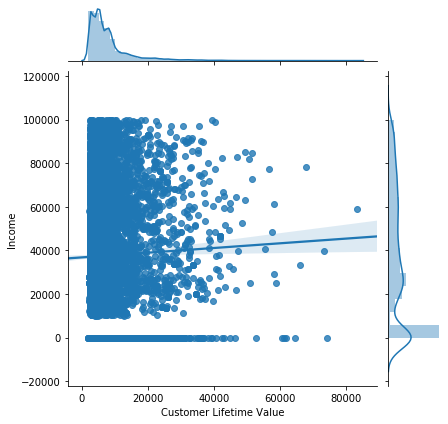

In [20]:
sns.jointplot(x="Customer Lifetime Value",y="Income",data=data,kind="reg")

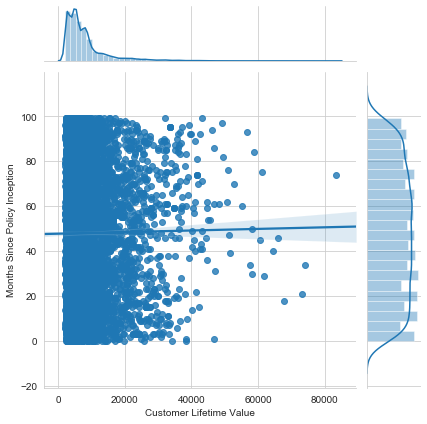

In [50]:
sns.jointplot(x="Customer Lifetime Value",y="Months Since Policy Inception",data=data,kind="reg")

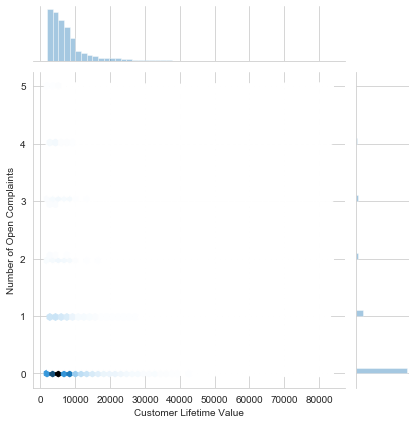

In [51]:
sns.jointplot(x="Customer Lifetime Value",y="Number of Open Complaints",data=data,kind="hex")

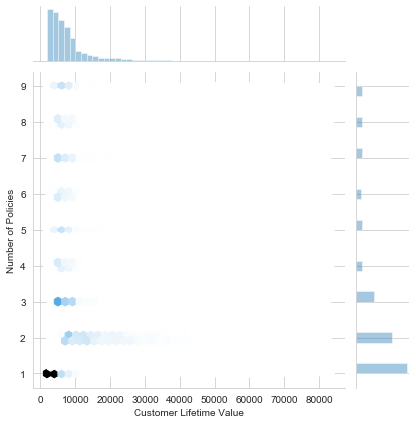

In [52]:
sns.jointplot(x="Customer Lifetime Value",y="Number of Policies",data=data,kind="hex")

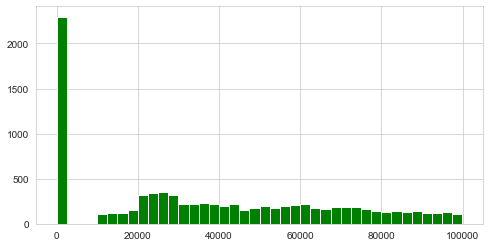

In [53]:
data['Income'].hist(color='green',bins=40,figsize=(8,4))

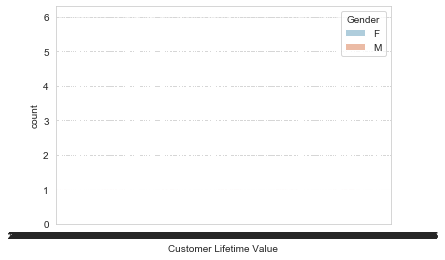

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Customer Lifetime Value',hue='Gender',data=data,palette='RdBu_r')

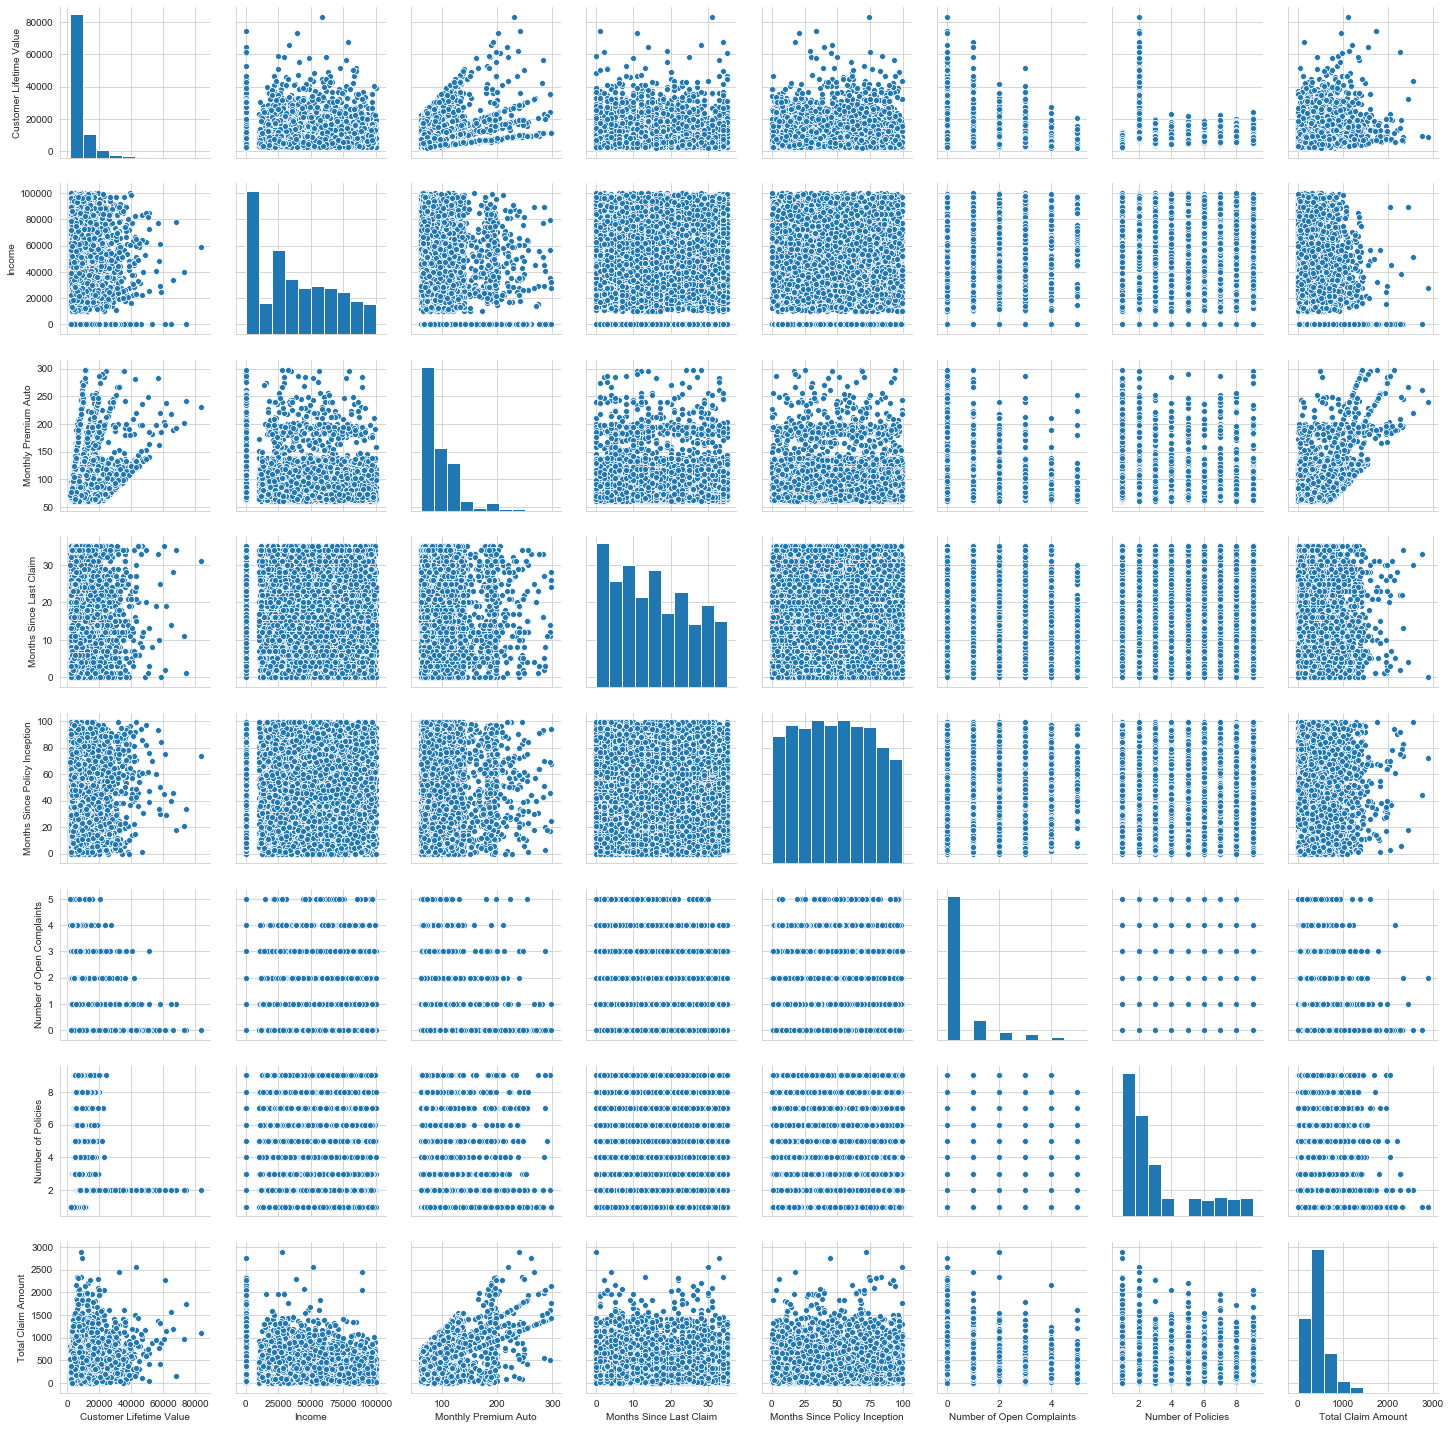

In [54]:
sns.pairplot(data)

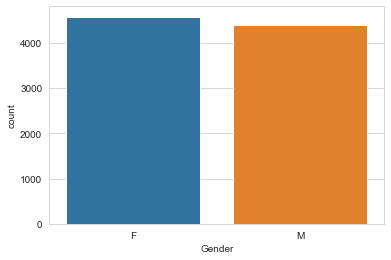

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=data)

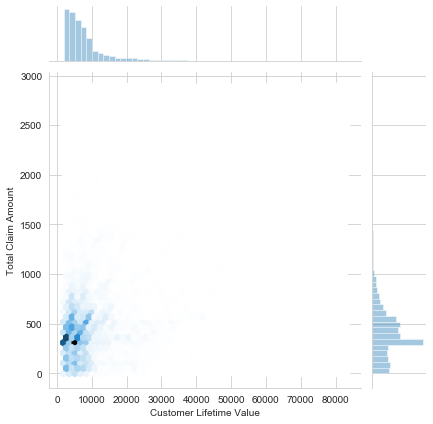

In [56]:
sns.jointplot(x="Customer Lifetime Value",y="Total Claim Amount",data=data,kind="hex")

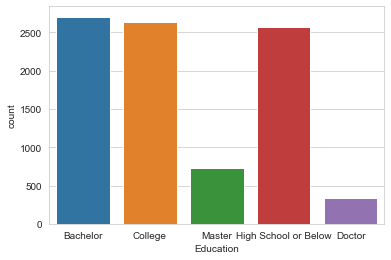

In [57]:
sns.countplot("Education",data=data)

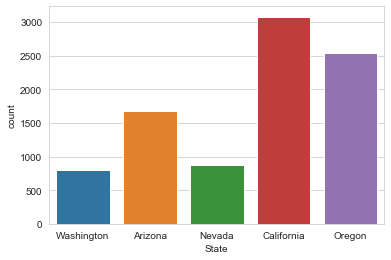

In [58]:
sns.countplot("State",data=data)

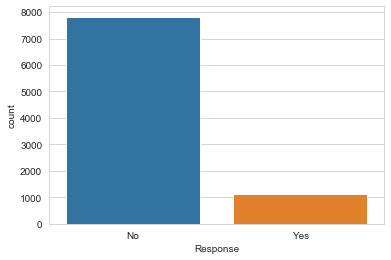

In [59]:
sns.countplot("Response",data=data)

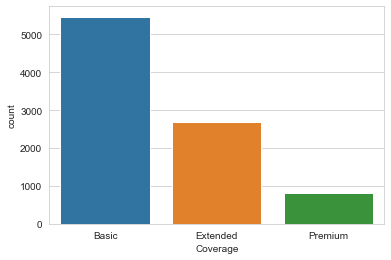

In [60]:
sns.countplot("Coverage",data=data)

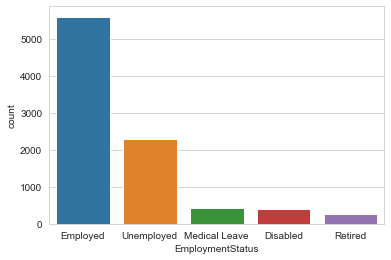

In [61]:
sns.countplot("EmploymentStatus",data=data)

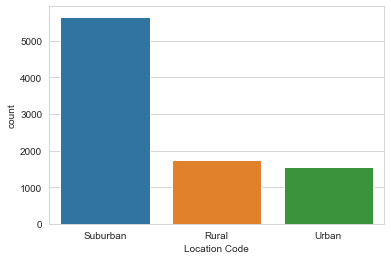

In [62]:

sns.countplot("Location Code",data=data)

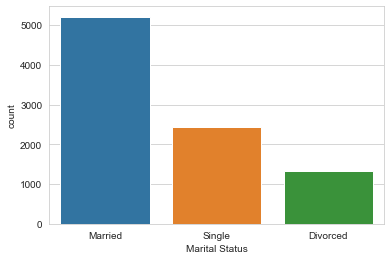

In [63]:

sns.countplot("Marital Status",data=data)

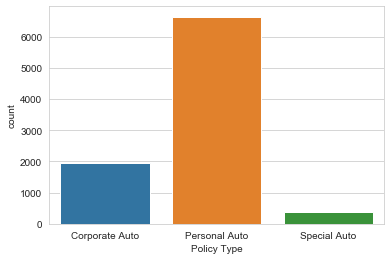

In [64]:
sns.countplot("Policy Type",data=data)

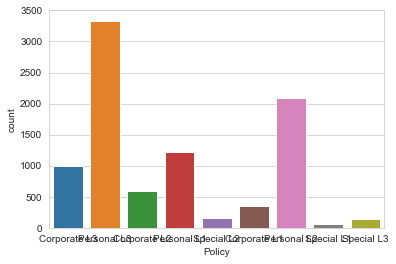

In [65]:
sns.countplot("Policy",data=data)

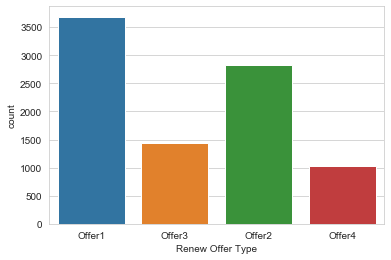

In [66]:
sns.countplot("Renew Offer Type",data=data)

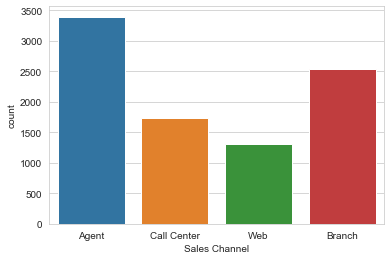

In [67]:
sns.countplot("Sales Channel",data=data)

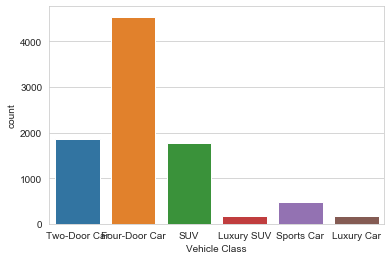

In [68]:
sns.countplot("Vehicle Class",data=data)

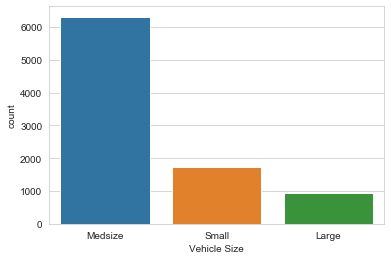

In [69]:
sns.countplot("Vehicle Size",data=data)

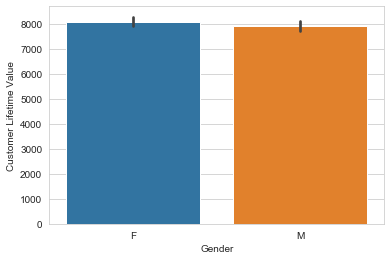

In [70]:
sns.barplot(x='Gender',y='Customer Lifetime Value',data=data)

In [139]:
data.shape

(7873, 22)

# Outliers with Boxplot
Check outliers with boxplot

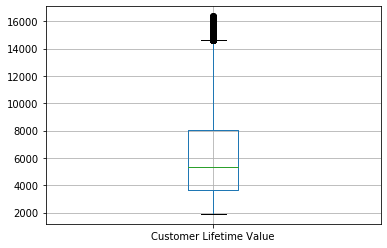

In [140]:
data.boxplot(column=["Customer Lifetime Value"])

In [141]:
# easy way to remove outliers
def sourav (data,age):
 Q1 = data[age].quantile(0.25)
 Q3 = data[age].quantile(0.75)
 IQR = Q3 - Q1
 data= data.loc[~((data[age] < (Q1 - 1.5 * IQR)) | (data[age] > (Q3 + 1.5 * IQR))),]
 return data

In [142]:
data = sourav(data,"Customer Lifetime Value")

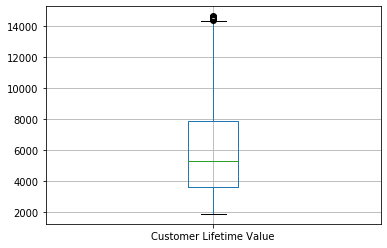

In [143]:
data.boxplot(column=["Customer Lifetime Value"])

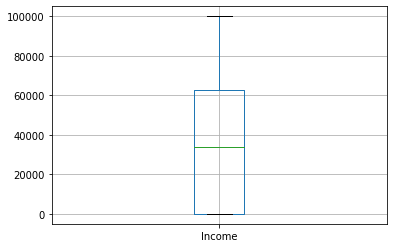

In [144]:
data.boxplot(column=["Income"])

In [145]:
data = sourav(data,"Income")

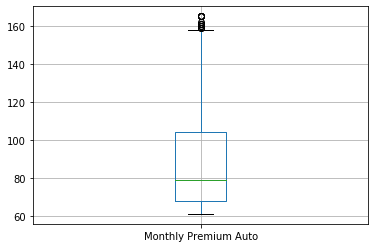

In [146]:
data.boxplot(column=["Monthly Premium Auto"])

In [147]:
data=sourav(data,"Monthly Premium Auto")

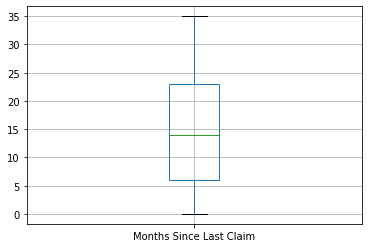

In [148]:
data.boxplot(column=["Months Since Last Claim"])

In [149]:
data=sourav(data,"Months Since Last Claim")

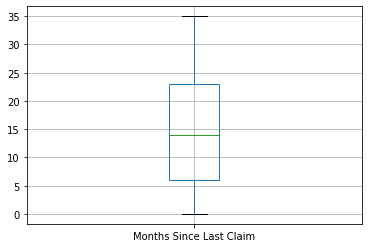

In [150]:
data.boxplot(column=["Months Since Last Claim"])

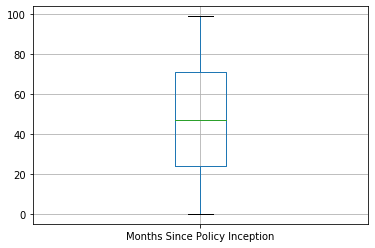

In [151]:
data.boxplot(column=["Months Since Policy Inception"])

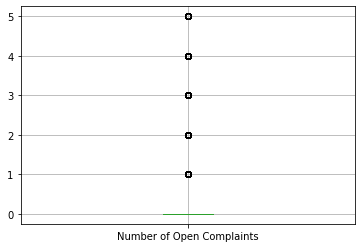

In [152]:
data.boxplot(column=["Number of Open Complaints"])

In [153]:
data=sourav(data,"Number of Open Complaints")

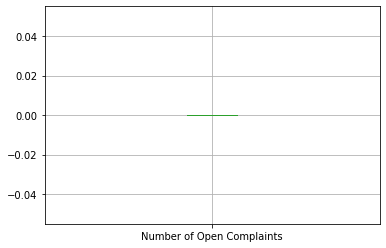

In [154]:
data.boxplot(column=["Number of Open Complaints"])

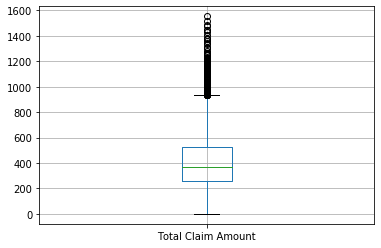

In [155]:
data.boxplot(column=["Total Claim Amount"])

In [156]:
data=sourav(data,"Total Claim Amount")

In [157]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize


In [158]:
X=data[["Income","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies","Total Claim Amount","State","Response","Coverage","Education","EmploymentStatus","Gender","Location Code","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class","Vehicle Size"]]
Y = data['Customer Lifetime Value']

In [159]:
X.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,56274,69,32,5,0,1,384.811147,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,48767,108,18,38,0,2,566.472247,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,0,106,18,65,0,7,529.881344,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,43836,73,12,44,0,1,138.130879,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,62902,69,14,94,0,2,159.383042,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [160]:
Y.head()

0     2763.519279
2    12887.431650
3     7645.861827
4     2813.692575
5     8256.297800
Name: Customer Lifetime Value, dtype: float64

In [161]:
#segregating categorical variables
cat = X.loc[:,["State","Response","Coverage","Education","EmploymentStatus","Gender","Location Code","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class","Vehicle Size"]]

In [162]:
cat.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [163]:
#dropping the original variables
X = X.drop(["State","Response","Coverage","Education","EmploymentStatus","Gender","Location Code","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class","Vehicle Size"],axis=1)

In [164]:
X.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,56274,69,32,5,0,1,384.811147
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879
5,62902,69,14,94,0,2,159.383042


In [165]:
# creating dummy varaibles
dum = pd.get_dummies(cat.astype(str),drop_first=True)

In [166]:
dum.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0


In [167]:
# concatnating the columns
X = pd.concat([X,dum],axis=1)

In [168]:
X.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,69,32,5,0,1,384.811147,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,48767,108,18,38,0,2,566.472247,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,106,18,65,0,7,529.881344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,43836,73,12,44,0,1,138.130879,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,62902,69,14,94,0,2,159.383042,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0


## Modelling

In [170]:
import statsmodels.api as sm
model= sm.OLS(Y, X).fit()

In [171]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared (uncentered):                   0.865
Model:                                 OLS   Adj. R-squared (uncentered):              0.864
Method:                      Least Squares   F-statistic:                              841.3
Date:                     Mon, 05 Apr 2021   Prob (F-statistic):                        0.00
Time:                             12:12:20   Log-Likelihood:                         -54889.
No. Observations:                     5958   AIC:                                  1.099e+05
Df Residuals:                         5913   BIC:                                  1.102e+05
Df Model:                               45                                                  
Covariance Type:                 nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Income                             0.0011      0.002      0.588      0.556      -0.003       0.005
Monthly Premium Auto              61.8352      3.558     17.378      0.000      54.860      68.811
Months Since Last Claim           -4.6677      3.156     -1.479      0.139     -10.854       1.519
Months Since Policy Inception     -1.8937      1.135     -1.669      0.095      -4.118       0.330
Number of Open Complaints      -1.164e-13   1.57e-13     -0.741      0.459   -4.24e-13    1.92e-13
Number of Policies               312.2560     12.792     24.411      0.000     287.180     337.332
Total Claim Amount                 0.2430      0.332      0.731      0.465      -0.408       0.894
State_California                  36.7172     89.895      0.408      0.683    -139.509     212.943
State_Nevada                    -117.1341    125.545     -0.933      0.351    -363.249     128.981
State_Oregon                      99.9974     92.641      1.079      0.280     -81.613     281.608
State_Washington                -230.4927    129.433     -1.781      0.075    -484.228      23.243
Response_Yes                     181.5293    101.458      1.789      0.074     -17.365     380.424
Coverage_Extended               -236.9917    103.779     -2.284      0.022    -440.437     -33.546
Coverage_Premium                  93.3304    200.405      0.466      0.641    -299.536     486.197
Education_College                116.8722     81.819      1.428      0.153     -43.523     277.267
Education_Doctor                 -82.2848    172.621     -0.477      0.634    -420.686     256.116
Education_High School or Below   127.5471     83.726      1.523      0.128     -36.586     291.680
Education_Master                  70.1747    126.090      0.557      0.578    -177.007     317.356
EmploymentStatus_Employed        144.2433    160.890      0.897      0.370    -171.160     459.647
EmploymentStatus_Medical Leave  -252.1567    201.104     -1.254      0.210    -646.393     142.080
EmploymentStatus_Retired        -191.9762    241.944     -0.793      0.428    -666.276     282.323
EmploymentStatus_Unemployed     -260.3400    161.743     -1.610      0.108    -577.416      56.736
Gender_M                         102.2533     63.740      1.604      0.109     -22.701     227.207
Location Code_Suburban          -195.8707    145.351     -1.348      0.178    -480.811      89.070
Location Code_Urban                4.0459    121.813      0.033      0.974    -234.752     242.844
Marital Status_Married            68.0072     92.831      0.733      0.464    -113.976     249.990
Marital Status_Single           -139.9334    108.624     -